# Análisis Estadístico: Nivel de Satisfacción de Responsables Operativos

**Autor:** Análisis Tesis de Ingeniería  
**Fecha:** Octubre 2025  
**Objetivo:** Evaluar el impacto del sistema implementado en la satisfacción de responsables operativos

## Estructura del Análisis

1. **Análisis Descriptivo**: Estadísticos generales, por dimensión y por responsable
2. **Visualizaciones**: Boxplots, gráficos de barras, radar chart, heatmap, histogramas
3. **Análisis Inferencial**: Pruebas de normalidad, Wilcoxon, tamaño del efecto
4. **Consistencia Interna**: Alpha de Cronbach
5. **Interpretación**: Conclusiones estadísticas y significancia práctica

---

In [1]:
# =============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, wilcoxon, ttest_rel
import warnings
import os
from datetime import datetime

# Configuración de warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Crear carpeta para resultados
os.makedirs('resultados_satisfaccion', exist_ok=True)

print("✓ Librerías importadas correctamente")
print("✓ Configuración de visualización establecida")
print("✓ Carpeta 'resultados_satisfaccion' creada/verificada")

✓ Librerías importadas correctamente
✓ Configuración de visualización establecida
✓ Carpeta 'resultados_satisfaccion' creada/verificada


In [2]:
# =============================================================================
# 2. CARGA Y VALIDACIÓN DE DATOS
# =============================================================================

# Cargar datos de preprueba (ANTES de implementar el sistema)
df_pre = pd.read_csv('data/Indicador2/satisfaccion_preprueba.csv')

# Cargar datos de postprueba (DESPUÉS de implementar el sistema)
df_post = pd.read_csv('data/Indicador2/satisfaccion_postprueba.csv')

# Cargar diccionario de preguntas
df_preguntas = pd.read_csv('data/Indicador2/diccionrio_preguntas.csv')

# Definir columnas de preguntas y dimensiones
preguntas = [f'P{i}' for i in range(1, 19)]  # P1 a P18
preguntas_cols = [col for col in df_pre.columns if col.startswith('P')]

# Mapeo de dimensiones
dimensiones = {
    'Acceso a información': ['P1_acceso_tiempo_real', 'P2_acceso_historico', 'P3_acceso_consolidado'],
    'Calidad de datos': ['P4_calidad_precision', 'P5_calidad_consistencia', 'P6_calidad_actualizada'],
    'Facilidad de uso': ['P7_facilidad_interfaz', 'P8_facilidad_navegacion', 'P9_facilidad_aprendizaje'],
    'Utilidad para decisiones': ['P10_utilidad_analisis', 'P11_utilidad_alertas', 'P12_utilidad_reportes'],
    'Tiempo de respuesta': ['P13_tiempo_generar_info', 'P14_tiempo_identificar_problemas', 'P15_tiempo_tomar_decision'],
    'Soporte general': ['P16_soporte_capacitacion', 'P17_soporte_resolucion', 'P18_soporte_documentacion']
}

# Validación de datos
print("="*80)
print("VALIDACIÓN DE DATOS")
print("="*80)
print(f"\n📊 PREPRUEBA:")
print(f"   - Número de responsables: {len(df_pre)}")
print(f"   - Columnas: {len(df_pre.columns)}")
print(f"   - Preguntas (P1-P18): {len(preguntas_cols)}")
print(f"   - Valores nulos: {df_pre[preguntas_cols].isnull().sum().sum()}")
print(f"   - Rango: [{df_pre[preguntas_cols].min().min()}, {df_pre[preguntas_cols].max().max()}]")

print(f"\n📊 POSTPRUEBA:")
print(f"   - Número de responsables: {len(df_post)}")
print(f"   - Columnas: {len(df_post.columns)}")
print(f"   - Preguntas (P1-P18): {len(preguntas_cols)}")
print(f"   - Valores nulos: {df_post[preguntas_cols].isnull().sum().sum()}")
print(f"   - Rango: [{df_post[preguntas_cols].min().min()}, {df_post[preguntas_cols].max().max()}]")

print(f"\n📋 DICCIONARIO DE PREGUNTAS:")
print(f"   - Total preguntas mapeadas: {len(df_preguntas)}")
print(f"   - Dimensiones: {df_preguntas['dimension'].nunique()}")

print(f"\n✓ Datos cargados y validados correctamente")
print(f"✓ n = {len(df_pre)} responsables (muestras pareadas)")
print("="*80)

VALIDACIÓN DE DATOS

📊 PREPRUEBA:
   - Número de responsables: 8
   - Columnas: 22
   - Preguntas (P1-P18): 18
   - Valores nulos: 0
   - Rango: [1, 4]

📊 POSTPRUEBA:
   - Número de responsables: 8
   - Columnas: 22
   - Preguntas (P1-P18): 18
   - Valores nulos: 0
   - Rango: [3, 5]

📋 DICCIONARIO DE PREGUNTAS:
   - Total preguntas mapeadas: 18
   - Dimensiones: 6

✓ Datos cargados y validados correctamente
✓ n = 8 responsables (muestras pareadas)


In [3]:
# =============================================================================
# 3. ESTADÍSTICOS DESCRIPTIVOS GENERALES
# =============================================================================

# Calcular promedios globales para cada responsable
promedio_pre = df_pre[preguntas_cols].mean(axis=1)
promedio_post = df_post[preguntas_cols].mean(axis=1)

# Promedio global (todas las respuestas)
global_pre_mean = df_pre[preguntas_cols].values.flatten().mean()
global_post_mean = df_post[preguntas_cols].values.flatten().mean()

# Estadísticos descriptivos completos
stats_pre = {
    'Fase': 'PREPRUEBA',
    'n': len(df_pre),
    'Respuestas totales': len(df_pre) * len(preguntas_cols),
    'Media global': global_pre_mean,
    'Mediana global': np.median(df_pre[preguntas_cols].values.flatten()),
    'Desv. Estándar': np.std(df_pre[preguntas_cols].values.flatten(), ddof=1),
    'Mínimo': df_pre[preguntas_cols].values.min(),
    'Q1': np.percentile(df_pre[preguntas_cols].values.flatten(), 25),
    'Q3': np.percentile(df_pre[preguntas_cols].values.flatten(), 75),
    'Máximo': df_pre[preguntas_cols].values.max(),
    'CV (%)': (np.std(df_pre[preguntas_cols].values.flatten(), ddof=1) / global_pre_mean) * 100
}

stats_post = {
    'Fase': 'POSTPRUEBA',
    'n': len(df_post),
    'Respuestas totales': len(df_post) * len(preguntas_cols),
    'Media global': global_post_mean,
    'Mediana global': np.median(df_post[preguntas_cols].values.flatten()),
    'Desv. Estándar': np.std(df_post[preguntas_cols].values.flatten(), ddof=1),
    'Mínimo': df_post[preguntas_cols].values.min(),
    'Q1': np.percentile(df_post[preguntas_cols].values.flatten(), 25),
    'Q3': np.percentile(df_post[preguntas_cols].values.flatten(), 75),
    'Máximo': df_post[preguntas_cols].values.max(),
    'CV (%)': (np.std(df_post[preguntas_cols].values.flatten(), ddof=1) / global_post_mean) * 100
}

# Crear DataFrame comparativo
df_stats = pd.DataFrame([stats_pre, stats_post])

print("\n" + "="*80)
print("ESTADÍSTICOS DESCRIPTIVOS GENERALES")
print("="*80)
print(df_stats.to_string(index=False))

# Calcular mejora
mejora_absoluta = global_post_mean - global_pre_mean
mejora_porcentual = (mejora_absoluta / global_pre_mean) * 100

print("\n" + "-"*80)
print("MEJORA GLOBAL")
print("-"*80)
print(f"Promedio PREPRUEBA:     {global_pre_mean:.2f} (escala 1-5)")
print(f"Promedio POSTPRUEBA:    {global_post_mean:.2f} (escala 1-5)")
print(f"Mejora absoluta:        {mejora_absoluta:+.2f} puntos")
print(f"Mejora porcentual:      {mejora_porcentual:+.2f}%")
print("="*80)


ESTADÍSTICOS DESCRIPTIVOS GENERALES
      Fase  n  Respuestas totales  Media global  Mediana global  Desv. Estándar  Mínimo  Q1  Q3  Máximo    CV (%)
 PREPRUEBA  8                 144      2.576389             3.0        0.598131       1 2.0 3.0       4 23.215853
POSTPRUEBA  8                 144      4.062500             4.0        0.593894       3 4.0 4.0       5 14.618923

--------------------------------------------------------------------------------
MEJORA GLOBAL
--------------------------------------------------------------------------------
Promedio PREPRUEBA:     2.58 (escala 1-5)
Promedio POSTPRUEBA:    4.06 (escala 1-5)
Mejora absoluta:        +1.49 puntos
Mejora porcentual:      +57.68%


In [4]:
# =============================================================================
# 4. ANÁLISIS POR DIMENSIÓN
# =============================================================================

# Calcular promedios por dimensión
resultados_dimensiones = []

for dim_nombre, dim_preguntas in dimensiones.items():
    pre_mean = df_pre[dim_preguntas].mean().mean()
    post_mean = df_post[dim_preguntas].mean().mean()
    mejora = post_mean - pre_mean
    mejora_pct = (mejora / pre_mean) * 100
    
    resultados_dimensiones.append({
        'Dimensión': dim_nombre,
        'Preprueba': pre_mean,
        'Postprueba': post_mean,
        'Mejora (puntos)': mejora,
        'Mejora (%)': mejora_pct
    })

df_dimensiones = pd.DataFrame(resultados_dimensiones)
df_dimensiones = df_dimensiones.sort_values('Mejora (puntos)', ascending=False)

print("\n" + "="*80)
print("ANÁLISIS POR DIMENSIÓN")
print("="*80)
print(df_dimensiones.to_string(index=False))

# Identificar dimensión con mayor/menor mejora
dim_max = df_dimensiones.iloc[0]
dim_min = df_dimensiones.iloc[-1]

print("\n" + "-"*80)
print("DIMENSIONES CRÍTICAS")
print("-"*80)
print(f"\n✅ MAYOR MEJORA: {dim_max['Dimensión']}")
print(f"   • Preprueba:  {dim_max['Preprueba']:.2f}")
print(f"   • Postprueba: {dim_max['Postprueba']:.2f}")
print(f"   • Mejora:     {dim_max['Mejora (puntos)']:+.2f} puntos ({dim_max['Mejora (%)']:+.2f}%)")

print(f"\n⚠️  MENOR MEJORA: {dim_min['Dimensión']}")
print(f"   • Preprueba:  {dim_min['Preprueba']:.2f}")
print(f"   • Postprueba: {dim_min['Postprueba']:.2f}")
print(f"   • Mejora:     {dim_min['Mejora (puntos)']:+.2f} puntos ({dim_min['Mejora (%)']:+.2f}%)")
print("="*80)


ANÁLISIS POR DIMENSIÓN
               Dimensión  Preprueba  Postprueba  Mejora (puntos)  Mejora (%)
     Tiempo de respuesta   2.375000    4.333333         1.958333   82.456140
    Acceso a información   2.291667    4.125000         1.833333   80.000000
Utilidad para decisiones   2.291667    4.125000         1.833333   80.000000
        Calidad de datos   2.500000    4.291667         1.791667   71.666667
         Soporte general   2.750000    3.708333         0.958333   34.848485
        Facilidad de uso   3.250000    3.791667         0.541667   16.666667

--------------------------------------------------------------------------------
DIMENSIONES CRÍTICAS
--------------------------------------------------------------------------------

✅ MAYOR MEJORA: Tiempo de respuesta
   • Preprueba:  2.38
   • Postprueba: 4.33
   • Mejora:     +1.96 puntos (+82.46%)

⚠️  MENOR MEJORA: Facilidad de uso
   • Preprueba:  3.25
   • Postprueba: 3.79
   • Mejora:     +0.54 puntos (+16.67%)


In [5]:
# =============================================================================
# 5. ANÁLISIS POR RESPONSABLE
# =============================================================================

# Calcular promedios por responsable
resultados_responsables = []

for idx in range(len(df_pre)):
    responsable_id = df_pre.iloc[idx]['id_responsable']
    cargo = df_pre.iloc[idx]['cargo']
    pre_mean = df_pre.iloc[idx][preguntas_cols].mean()
    post_mean = df_post.iloc[idx][preguntas_cols].mean()
    mejora = post_mean - pre_mean
    mejora_pct = (mejora / pre_mean) * 100
    
    resultados_responsables.append({
        'ID': responsable_id,
        'Cargo': cargo,
        'Preprueba': pre_mean,
        'Postprueba': post_mean,
        'Mejora (puntos)': mejora,
        'Mejora (%)': mejora_pct
    })

df_responsables = pd.DataFrame(resultados_responsables)
df_responsables = df_responsables.sort_values('Mejora (puntos)', ascending=False)

print("\n" + "="*80)
print("ANÁLISIS POR RESPONSABLE")
print("="*80)
print(df_responsables.to_string(index=False))

# Identificar responsable con mayor/menor satisfacción
resp_max = df_responsables.iloc[0]
resp_min = df_responsables.iloc[-1]

print("\n" + "-"*80)
print("RESPONSABLES DESTACADOS")
print("-"*80)
print(f"\n✅ MAYOR MEJORA: {resp_max['ID']} - {resp_max['Cargo']}")
print(f"   • Preprueba:  {resp_max['Preprueba']:.2f}")
print(f"   • Postprueba: {resp_max['Postprueba']:.2f}")
print(f"   • Mejora:     {resp_max['Mejora (puntos)']:+.2f} puntos ({resp_max['Mejora (%)']:+.2f}%)")

print(f"\n⚠️  MENOR MEJORA: {resp_min['ID']} - {resp_min['Cargo']}")
print(f"   • Preprueba:  {resp_min['Preprueba']:.2f}")
print(f"   • Postprueba: {resp_min['Postprueba']:.2f}")
print(f"   • Mejora:     {resp_min['Mejora (puntos)']:+.2f} puntos ({resp_min['Mejora (%)']:+.2f}%)")
print("="*80)


ANÁLISIS POR RESPONSABLE
 ID                Cargo  Preprueba  Postprueba  Mejora (puntos)  Mejora (%)
R01   Jefe de Producción   2.611111    4.500000         1.888889   72.340426
R08 Ingeniero de Proceso   3.111111    4.722222         1.611111   51.785714
R02     Supervisor Corte   2.500000    4.111111         1.611111   64.444444
R06     Jefe Turno Tarde   2.500000    3.944444         1.444444   57.777778
R07     Jefe Turno Noche   2.222222    3.666667         1.444444   65.000000
R05    Jefe Turno Mañana   2.944444    4.333333         1.388889   47.169811
R03   Supervisor Formado   2.555556    3.833333         1.277778   50.000000
R04   Supervisor Sellado   2.166667    3.388889         1.222222   56.410256

--------------------------------------------------------------------------------
RESPONSABLES DESTACADOS
--------------------------------------------------------------------------------

✅ MAYOR MEJORA: R01 - Jefe de Producción
   • Preprueba:  2.61
   • Postprueba: 4.50
   • Mej

---
## VISUALIZACIONES ESTADÍSTICAS
---

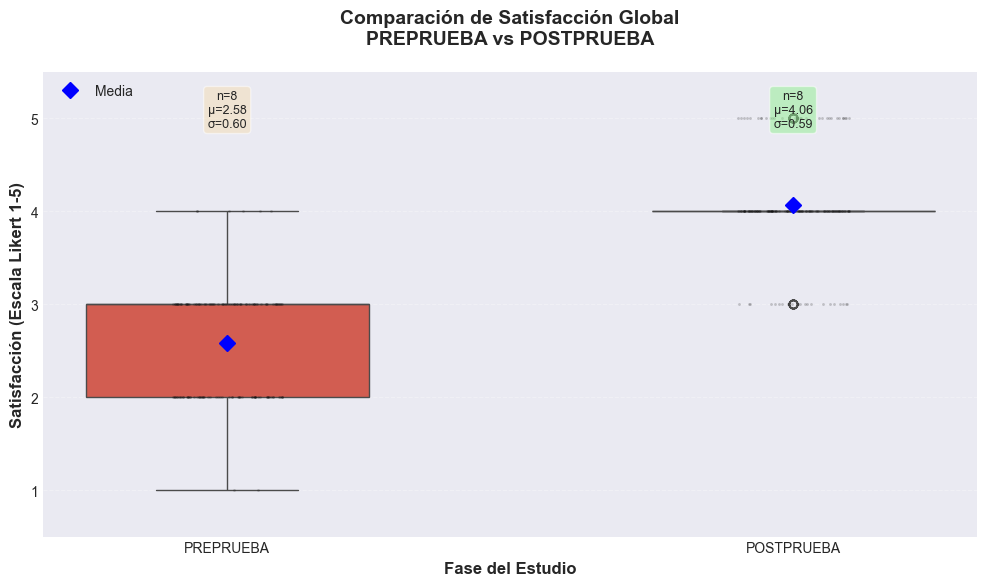

✓ Boxplot comparativo generado y guardado


In [6]:
# =============================================================================
# 6. VISUALIZACIÓN 1: BOXPLOT COMPARATIVO GENERAL
# =============================================================================

# Preparar datos para boxplot
data_boxplot = pd.DataFrame({
    'Satisfacción (Escala 1-5)': np.concatenate([
        df_pre[preguntas_cols].values.flatten(),
        df_post[preguntas_cols].values.flatten()
    ]),
    'Fase': ['PREPRUEBA']*(len(df_pre)*len(preguntas_cols)) + 
            ['POSTPRUEBA']*(len(df_post)*len(preguntas_cols))
})

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Crear boxplot
bp = sns.boxplot(x='Fase', y='Satisfacción (Escala 1-5)', data=data_boxplot,
                 palette=['#E74C3C', '#2ECC71'], ax=ax, width=0.5)

# Agregar puntos individuales con transparencia
sns.stripplot(x='Fase', y='Satisfacción (Escala 1-5)', data=data_boxplot,
              color='black', alpha=0.2, size=2, ax=ax)

# Agregar líneas de media
medias = [global_pre_mean, global_post_mean]
x_positions = [0, 1]
ax.plot(x_positions, medias, 'D', color='blue', markersize=8,
        label=f'Media', zorder=10)

# Personalización
ax.set_title('Comparación de Satisfacción Global\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.set_ylabel('Satisfacción (Escala Likert 1-5)', fontsize=12, fontweight='bold')
ax.set_ylim(0.5, 5.5)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(loc='upper left')

# Agregar anotaciones con estadísticos
ax.text(0, 5.3, f'n={len(df_pre)}\nμ={global_pre_mean:.2f}\nσ={stats_pre["Desv. Estándar"]:.2f}',
        ha='center', va='top', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.text(1, 5.3, f'n={len(df_post)}\nμ={global_post_mean:.2f}\nσ={stats_post["Desv. Estándar"]:.2f}',
        ha='center', va='top', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('resultados_satisfaccion/01_boxplot_comparativo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Boxplot comparativo generado y guardado")

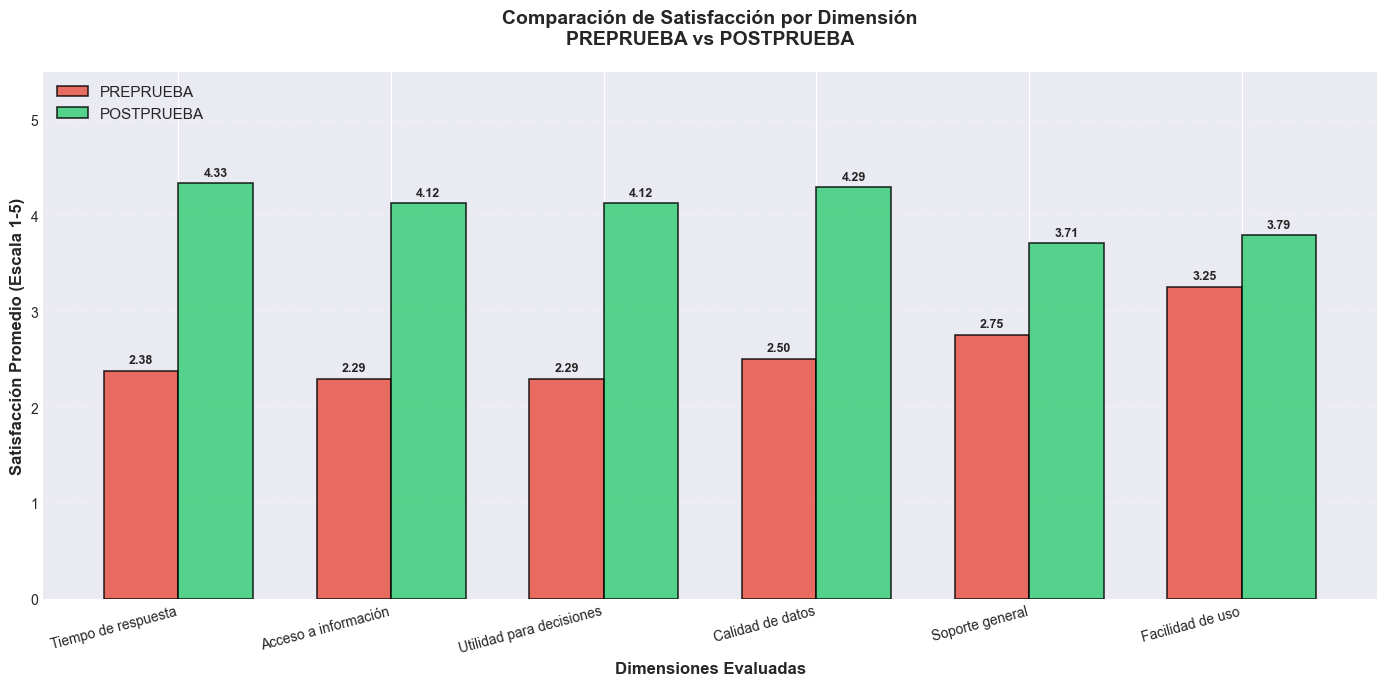

✓ Gráfico de barras por dimensión generado y guardado


In [7]:
# =============================================================================
# 7. VISUALIZACIÓN 2: GRÁFICO DE BARRAS POR DIMENSIÓN
# =============================================================================

fig, ax = plt.subplots(figsize=(14, 7))

# Preparar datos
x = np.arange(len(df_dimensiones))
width = 0.35

# Crear barras
bars1 = ax.bar(x - width/2, df_dimensiones['Preprueba'], width,
               label='PREPRUEBA', color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, df_dimensiones['Postprueba'], width,
               label='POSTPRUEBA', color='#2ECC71', alpha=0.8, edgecolor='black', linewidth=1.2)

# Agregar valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Personalización
ax.set_title('Comparación de Satisfacción por Dimensión\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Satisfacción Promedio (Escala 1-5)', fontsize=12, fontweight='bold')
ax.set_xlabel('Dimensiones Evaluadas', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_dimensiones['Dimensión'], rotation=15, ha='right')
ax.set_ylim(0, 5.5)
ax.legend(loc='upper left', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('resultados_satisfaccion/02_barras_dimensiones.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico de barras por dimensión generado y guardado")

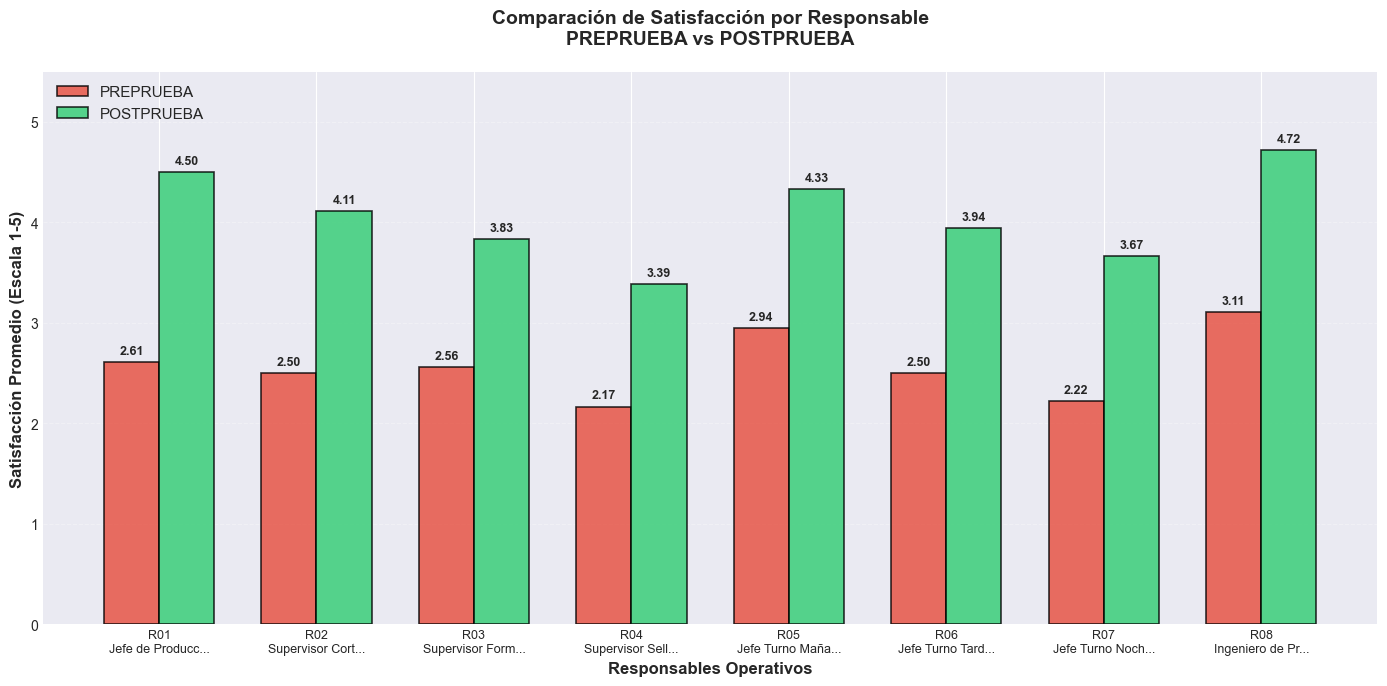

✓ Gráfico de barras por responsable generado y guardado


In [8]:
# =============================================================================
# 8. VISUALIZACIÓN 3: GRÁFICO DE BARRAS POR RESPONSABLE
# =============================================================================

# Ordenar por ID para visualización consistente
df_resp_sorted = df_responsables.sort_values('ID')

fig, ax = plt.subplots(figsize=(14, 7))

# Preparar datos
x = np.arange(len(df_resp_sorted))
width = 0.35

# Crear barras
bars1 = ax.bar(x - width/2, df_resp_sorted['Preprueba'], width,
               label='PREPRUEBA', color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, df_resp_sorted['Postprueba'], width,
               label='POSTPRUEBA', color='#2ECC71', alpha=0.8, edgecolor='black', linewidth=1.2)

# Agregar valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Personalización
ax.set_title('Comparación de Satisfacción por Responsable\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Satisfacción Promedio (Escala 1-5)', fontsize=12, fontweight='bold')
ax.set_xlabel('Responsables Operativos', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f"{row['ID']}\n{row['Cargo'][:15]}..." if len(row['Cargo']) > 15 
                     else f"{row['ID']}\n{row['Cargo']}" 
                     for _, row in df_resp_sorted.iterrows()],
                    rotation=0, ha='center', fontsize=9)
ax.set_ylim(0, 5.5)
ax.legend(loc='upper left', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('resultados_satisfaccion/03_barras_responsables.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico de barras por responsable generado y guardado")

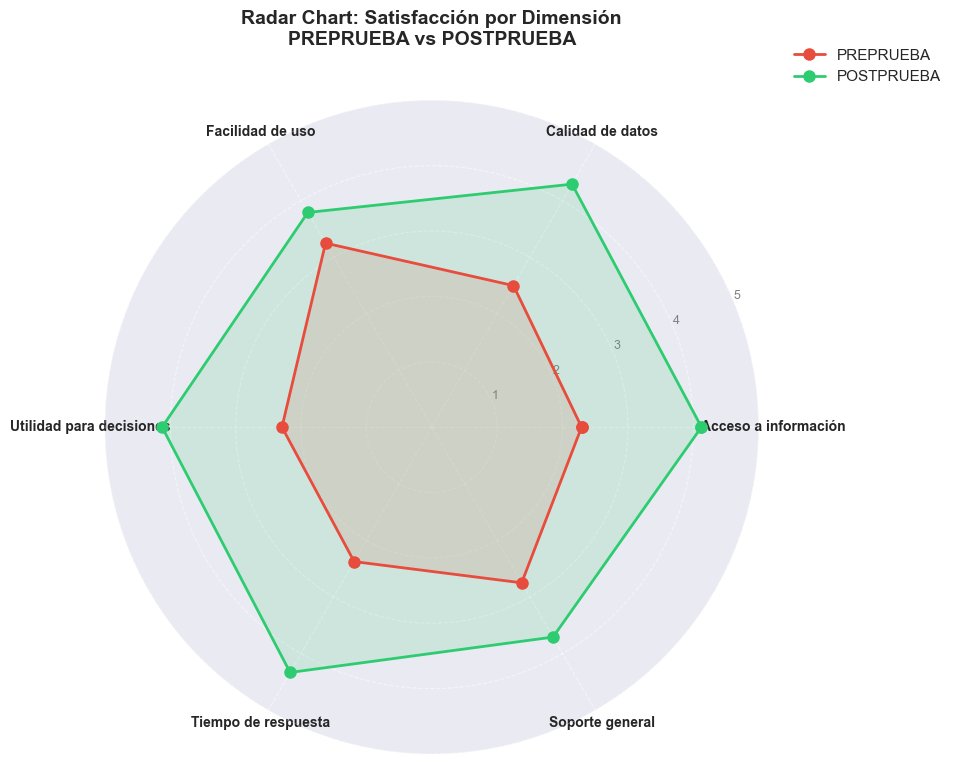

✓ Radar chart generado y guardado


In [9]:
# =============================================================================
# 9. VISUALIZACIÓN 4: RADAR CHART (6 DIMENSIONES)
# =============================================================================

# Preparar datos para radar chart
categorias = list(dimensiones.keys())
valores_pre = []
valores_post = []

for dim_nombre, dim_preguntas in dimensiones.items():
    valores_pre.append(df_pre[dim_preguntas].mean().mean())
    valores_post.append(df_post[dim_preguntas].mean().mean())

# Número de variables
num_vars = len(categorias)

# Calcular ángulos para cada dimensión
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
valores_pre += valores_pre[:1]  # Cerrar el polígono
valores_post += valores_post[:1]
angles += angles[:1]

# Crear figura
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot PREPRUEBA
ax.plot(angles, valores_pre, 'o-', linewidth=2, label='PREPRUEBA',
        color='#E74C3C', markersize=8)
ax.fill(angles, valores_pre, alpha=0.15, color='#E74C3C')

# Plot POSTPRUEBA
ax.plot(angles, valores_post, 'o-', linewidth=2, label='POSTPRUEBA',
        color='#2ECC71', markersize=8)
ax.fill(angles, valores_post, alpha=0.15, color='#2ECC71')

# Configurar etiquetas de las categorías
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, fontsize=10, fontweight='bold')

# Configurar rango radial
ax.set_ylim(0, 5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=9, color='gray')

# Título y leyenda
ax.set_title('Radar Chart: Satisfacción por Dimensión\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=40)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

# Grid
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('resultados_satisfaccion/04_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Radar chart generado y guardado")

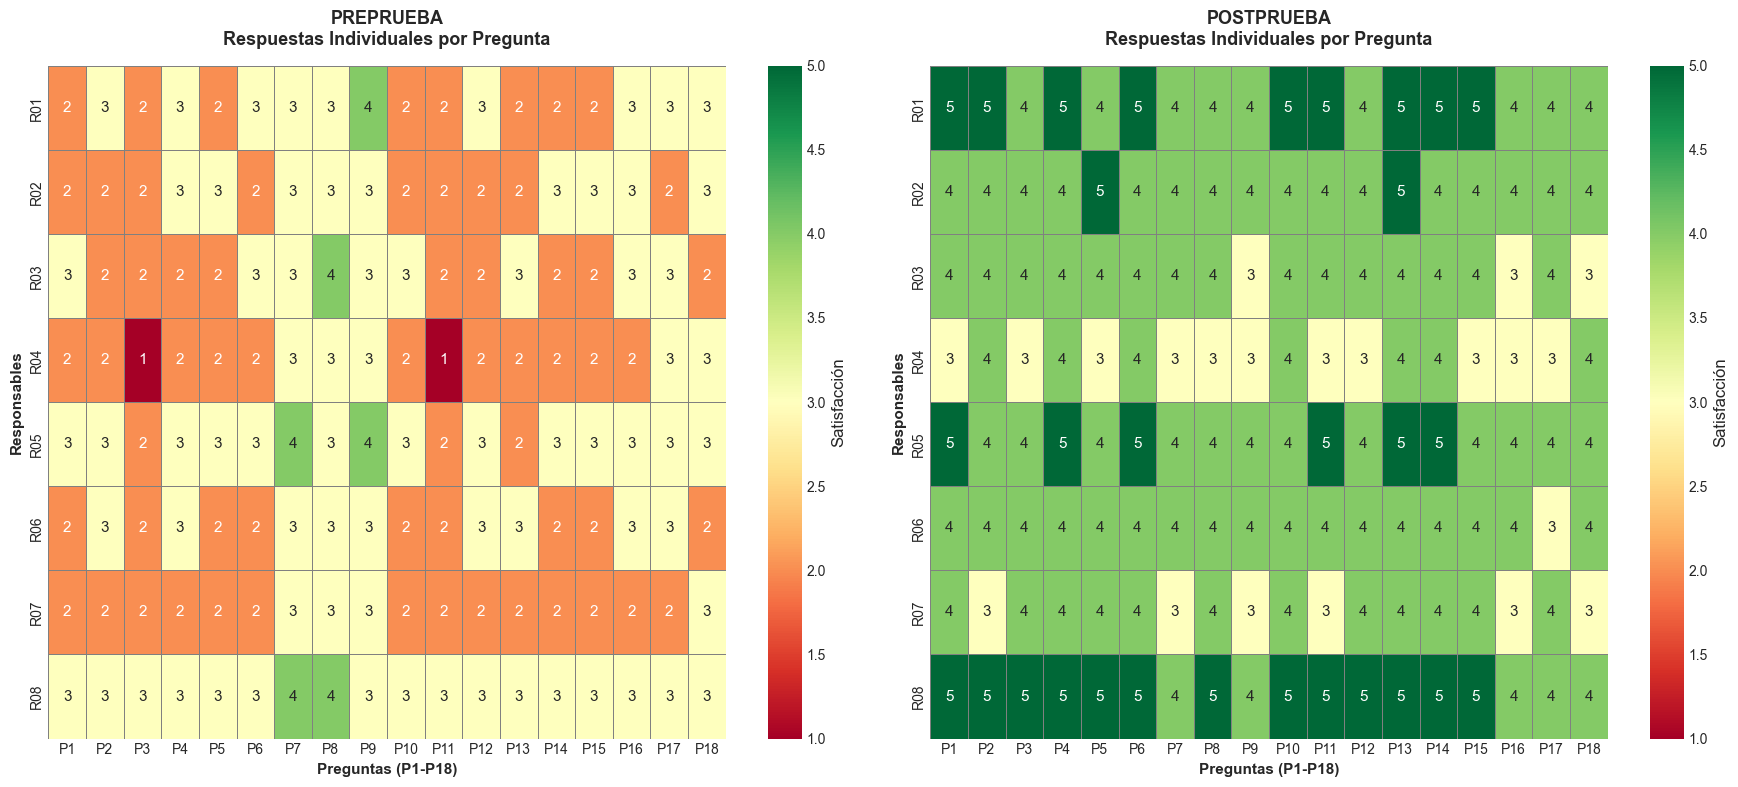

✓ Heatmaps de respuestas individuales generados y guardados


In [10]:
# =============================================================================
# 10. VISUALIZACIÓN 5: HEATMAP DE RESPUESTAS INDIVIDUALES
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Preparar datos (responsables en filas, preguntas en columnas)
data_pre_heatmap = df_pre[preguntas_cols].values
data_post_heatmap = df_post[preguntas_cols].values

# Etiquetas
responsables_labels = df_pre['id_responsable'].tolist()
preguntas_labels = [col.split('_')[0].upper() for col in preguntas_cols]  # P1, P2, ...

# Heatmap PREPRUEBA
sns.heatmap(data_pre_heatmap, annot=True, fmt='.0f', cmap='RdYlGn',
            vmin=1, vmax=5, cbar_kws={'label': 'Satisfacción'},
            xticklabels=preguntas_labels, yticklabels=responsables_labels,
            ax=axes[0], linewidths=0.5, linecolor='gray')
axes[0].set_title('PREPRUEBA\nRespuestas Individuales por Pregunta',
                  fontsize=13, fontweight='bold', pad=15)
axes[0].set_xlabel('Preguntas (P1-P18)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Responsables', fontsize=11, fontweight='bold')

# Heatmap POSTPRUEBA
sns.heatmap(data_post_heatmap, annot=True, fmt='.0f', cmap='RdYlGn',
            vmin=1, vmax=5, cbar_kws={'label': 'Satisfacción'},
            xticklabels=preguntas_labels, yticklabels=responsables_labels,
            ax=axes[1], linewidths=0.5, linecolor='gray')
axes[1].set_title('POSTPRUEBA\nRespuestas Individuales por Pregunta',
                  fontsize=13, fontweight='bold', pad=15)
axes[1].set_xlabel('Preguntas (P1-P18)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Responsables', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('resultados_satisfaccion/05_heatmap_respuestas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmaps de respuestas individuales generados y guardados")

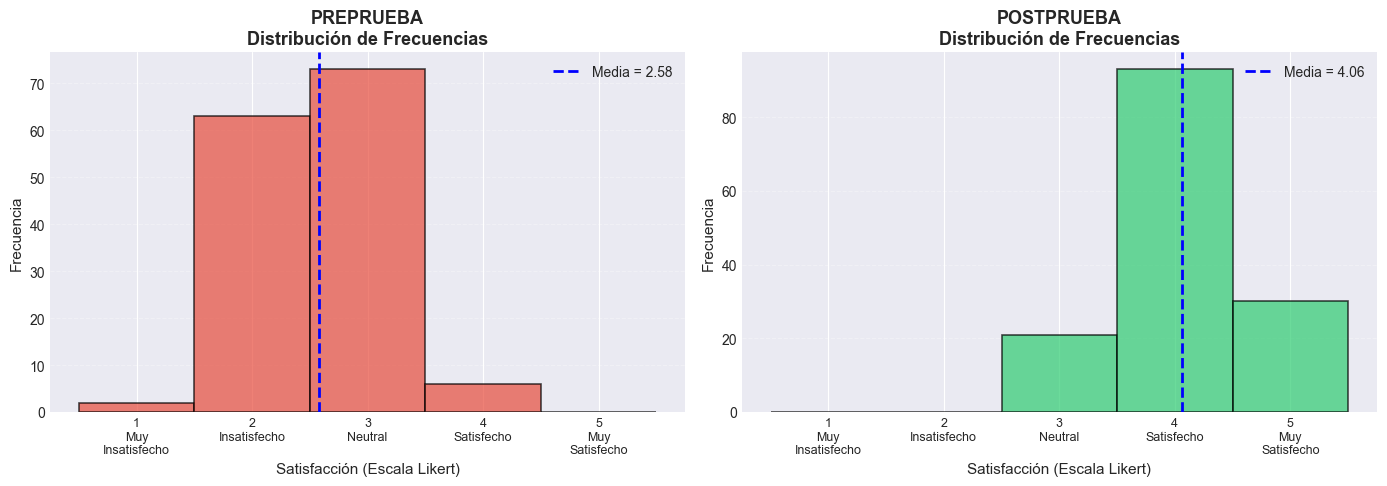

✓ Histogramas de distribución generados y guardados


In [11]:
# =============================================================================
# 11. VISUALIZACIÓN 6: HISTOGRAMA DE DISTRIBUCIÓN DE FRECUENCIAS
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PREPRUEBA
data_pre_flat = df_pre[preguntas_cols].values.flatten()
axes[0].hist(data_pre_flat, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
             color='#E74C3C', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[0].set_title('PREPRUEBA\nDistribución de Frecuencias',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Satisfacción (Escala Likert)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_xticks([1, 2, 3, 4, 5])
axes[0].set_xticklabels(['1\nMuy\nInsatisfecho', '2\nInsatisfecho',
                         '3\nNeutral', '4\nSatisfecho', '5\nMuy\nSatisfecho'],
                        fontsize=9)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].axvline(global_pre_mean, color='blue', linestyle='--', linewidth=2,
                label=f'Media = {global_pre_mean:.2f}')
axes[0].legend()

# POSTPRUEBA
data_post_flat = df_post[preguntas_cols].values.flatten()
axes[1].hist(data_post_flat, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
             color='#2ECC71', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[1].set_title('POSTPRUEBA\nDistribución de Frecuencias',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Satisfacción (Escala Likert)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].set_xticklabels(['1\nMuy\nInsatisfecho', '2\nInsatisfecho',
                         '3\nNeutral', '4\nSatisfecho', '5\nMuy\nSatisfecho'],
                        fontsize=9)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].axvline(global_post_mean, color='blue', linestyle='--', linewidth=2,
                label=f'Media = {global_post_mean:.2f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('resultados_satisfaccion/06_histogramas_frecuencia.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Histogramas de distribución generados y guardados")

---
## ANÁLISIS INFERENCIAL
---

In [12]:
# =============================================================================
# 12. PRUEBAS DE NORMALIDAD (Shapiro-Wilk)
# =============================================================================

# Promedios individuales para cada responsable
promedios_pre = df_pre[preguntas_cols].mean(axis=1).values
promedios_post = df_post[preguntas_cols].mean(axis=1).values

# Calcular diferencias pareadas
diferencias = promedios_post - promedios_pre

# Realizar pruebas de Shapiro-Wilk
stat_pre, p_pre = shapiro(promedios_pre)
stat_post, p_post = shapiro(promedios_post)
stat_diff, p_diff = shapiro(diferencias)

# Nivel de significancia
alpha = 0.05

print("\n" + "="*80)
print("PRUEBAS DE NORMALIDAD: Shapiro-Wilk")
print("="*80)
print(f"\nH0: Los datos provienen de una distribución normal")
print(f"H1: Los datos NO provienen de una distribución normal")
print(f"Nivel de significancia: α = {alpha}")
print("\n" + "-"*80)

print(f"\n📊 PREPRUEBA (Promedios Individuales):")
print(f"   • Estadístico W: {stat_pre:.6f}")
print(f"   • p-valor: {p_pre:.6f}")
print(f"   • Decisión: {'RECHAZAR H0 (NO normal)' if p_pre < alpha else 'NO RECHAZAR H0 (Normal)'}")

print(f"\n📊 POSTPRUEBA (Promedios Individuales):")
print(f"   • Estadístico W: {stat_post:.6f}")
print(f"   • p-valor: {p_post:.6f}")
print(f"   • Decisión: {'RECHAZAR H0 (NO normal)' if p_post < alpha else 'NO RECHAZAR H0 (Normal)'}")

print(f"\n📊 DIFERENCIAS PAREADAS (POST - PRE):")
print(f"   • Estadístico W: {stat_diff:.6f}")
print(f"   • p-valor: {p_diff:.6f}")
print(f"   • Decisión: {'RECHAZAR H0 (NO normal)' if p_diff < alpha else 'NO RECHAZAR H0 (Normal)'}")

print("\n" + "-"*80)
print(f"\n🔍 CONCLUSIÓN SOBRE NORMALIDAD:")
print("   ⚠️  IMPORTANTE: Datos de escala Likert son ORDINALES")
print("   ⚠️  Se recomienda usar pruebas NO PARAMÉTRICAS independiente de normalidad")
print("   ✓ RECOMENDACIÓN: Usar prueba de Wilcoxon para muestras pareadas")
test_recomendado = "Wilcoxon"
print("="*80)


PRUEBAS DE NORMALIDAD: Shapiro-Wilk

H0: Los datos provienen de una distribución normal
H1: Los datos NO provienen de una distribución normal
Nivel de significancia: α = 0.05

--------------------------------------------------------------------------------

📊 PREPRUEBA (Promedios Individuales):
   • Estadístico W: 0.929214
   • p-valor: 0.508950
   • Decisión: NO RECHAZAR H0 (Normal)

📊 POSTPRUEBA (Promedios Individuales):
   • Estadístico W: 0.987929
   • p-valor: 0.991215
   • Decisión: NO RECHAZAR H0 (Normal)

📊 DIFERENCIAS PAREADAS (POST - PRE):
   • Estadístico W: 0.939127
   • p-valor: 0.602507
   • Decisión: NO RECHAZAR H0 (Normal)

--------------------------------------------------------------------------------

🔍 CONCLUSIÓN SOBRE NORMALIDAD:
   ⚠️  IMPORTANTE: Datos de escala Likert son ORDINALES
   ⚠️  Se recomienda usar pruebas NO PARAMÉTRICAS independiente de normalidad
   ✓ RECOMENDACIÓN: Usar prueba de Wilcoxon para muestras pareadas


In [13]:
# =============================================================================
# 13. PRUEBAS DE HIPÓTESIS: WILCOXON Y T-TEST PAREADO
# =============================================================================

print("\n" + "="*80)
print("PRUEBAS DE HIPÓTESIS: COMPARACIÓN PREPRUEBA vs POSTPRUEBA")
print("="*80)

# Hipótesis
print(f"\nH0 (Hipótesis Nula): No hay diferencia en satisfacción (PRE = POST)")
print(f"H1 (Hipótesis Alterna): Hay diferencia significativa (PRE ≠ POST)")
print(f"Nivel de significancia: α = {alpha}")

# -------------------------
# 1. PRUEBA DE WILCOXON (NO PARAMÉTRICA - RECOMENDADA)
# -------------------------
w_stat, p_w = wilcoxon(promedios_pre, promedios_post, alternative='two-sided')

print("\n" + "-"*80)
print("1️⃣  PRUEBA DE WILCOXON (No Paramétrica - RECOMENDADA para Likert)")
print("-"*80)
print(f"   • Estadístico W: {w_stat:.6f}")
print(f"   • p-valor (bilateral): {p_w:.6f}")
print(f"   • Decisión: {'RECHAZAR H0' if p_w < alpha else 'NO RECHAZAR H0'}")
print(f"   • Conclusión: {'Hay diferencia SIGNIFICATIVA' if p_w < alpha else 'NO hay diferencia significativa'}")

# -------------------------
# 2. PRUEBA T DE STUDENT PAREADA (PARAMÉTRICA - COMPLEMENTARIA)
# -------------------------
t_stat, p_t = ttest_rel(promedios_pre, promedios_post)

print("\n" + "-"*80)
print("2️⃣  PRUEBA T DE STUDENT PAREADA (Paramétrica - Complementaria)")
print("-"*80)
print(f"   • Estadístico t: {t_stat:.6f}")
print(f"   • p-valor (bilateral): {p_t:.6f}")
print(f"   • Grados de libertad: {len(promedios_pre) - 1}")
print(f"   • Decisión: {'RECHAZAR H0' if p_t < alpha else 'NO RECHAZAR H0'}")
print(f"   • Conclusión: {'Hay diferencia SIGNIFICATIVA' if p_t < alpha else 'NO hay diferencia significativa'}")

# -------------------------
# 3. CONCLUSIÓN FINAL
# -------------------------
print("\n" + "="*80)
print("🎯 PRUEBA OFICIAL Y CONCLUSIÓN FINAL")
print("="*80)
print(f"✓ Prueba oficial: WILCOXON (apropiada para escala ordinal Likert)")
print(f"✓ Estadístico: W = {w_stat:.6f}")
print(f"✓ p-valor: {p_w:.6f}")

p_final = p_w
test_final = "Wilcoxon"

print(f"\n{'='*80}")
print(f"RESULTADO ESTADÍSTICO:")
if p_final < alpha:
    print(f"   ✅ RECHAZAMOS H0 (p = {p_final:.6f} < α = {alpha})")
    print(f"   ✅ Existe evidencia estadísticamente SIGNIFICATIVA de que")
    print(f"      la satisfacción AUMENTÓ después de implementar el sistema")
    print(f"   ✅ Mejora promedio: {mejora_absoluta:.2f} puntos ({mejora_porcentual:.2f}%)")
else:
    print(f"   ❌ NO RECHAZAMOS H0 (p = {p_final:.6f} ≥ α = {alpha})")
    print(f"   ❌ NO hay evidencia estadísticamente significativa de diferencia")
print("="*80)


PRUEBAS DE HIPÓTESIS: COMPARACIÓN PREPRUEBA vs POSTPRUEBA

H0 (Hipótesis Nula): No hay diferencia en satisfacción (PRE = POST)
H1 (Hipótesis Alterna): Hay diferencia significativa (PRE ≠ POST)
Nivel de significancia: α = 0.05

--------------------------------------------------------------------------------
1️⃣  PRUEBA DE WILCOXON (No Paramétrica - RECOMENDADA para Likert)
--------------------------------------------------------------------------------
   • Estadístico W: 0.000000
   • p-valor (bilateral): 0.007812
   • Decisión: RECHAZAR H0
   • Conclusión: Hay diferencia SIGNIFICATIVA

--------------------------------------------------------------------------------
2️⃣  PRUEBA T DE STUDENT PAREADA (Paramétrica - Complementaria)
--------------------------------------------------------------------------------
   • Estadístico t: -19.676490
   • p-valor (bilateral): 0.000000
   • Grados de libertad: 7
   • Decisión: RECHAZAR H0
   • Conclusión: Hay diferencia SIGNIFICATIVA

🎯 PRUEBA OFI

In [14]:
# =============================================================================
# 14. TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA
# =============================================================================

# -------------------------
# 1. d de Cohen para muestras pareadas
# -------------------------
d_cohen = np.mean(diferencias) / np.std(diferencias, ddof=1)

def interpretar_cohen_d(d):
    d_abs = abs(d)
    if d_abs < 0.2:
        return "INSIGNIFICANTE (d < 0.2)"
    elif d_abs < 0.5:
        return "PEQUEÑO (0.2 ≤ d < 0.5)"
    elif d_abs < 0.8:
        return "MEDIANO (0.5 ≤ d < 0.8)"
    else:
        return "GRANDE (d ≥ 0.8)"

# -------------------------
# 2. r de Rosenthal (para Wilcoxon)
# -------------------------
n = len(diferencias)
z_score = stats.norm.ppf(1 - p_w/2)  # Convertir p-valor a Z
r_rosenthal = z_score / np.sqrt(n)

def interpretar_r(r):
    r_abs = abs(r)
    if r_abs < 0.1:
        return "INSIGNIFICANTE (r < 0.1)"
    elif r_abs < 0.3:
        return "PEQUEÑO (0.1 ≤ r < 0.3)"
    elif r_abs < 0.5:
        return "MEDIANO (0.3 ≤ r < 0.5)"
    else:
        return "GRANDE (r ≥ 0.5)"

# -------------------------
# 3. Intervalo de Confianza al 95%
# -------------------------
from scipy.stats import t as t_dist

media_diff = np.mean(diferencias)
se_diff = np.std(diferencias, ddof=1) / np.sqrt(n)
t_critico = t_dist.ppf(0.975, df=n-1)

ic_inferior = media_diff - t_critico * se_diff
ic_superior = media_diff + t_critico * se_diff

print("\n" + "="*80)
print("TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA")
print("="*80)

print(f"\n📏 TAMAÑO DEL EFECTO:")
print(f"\n   d de Cohen (para muestras pareadas):")
print(f"   • d = {d_cohen:.4f}")
print(f"   • Interpretación: {interpretar_cohen_d(d_cohen)}")

print(f"\n   r de Rosenthal (para Wilcoxon):")
print(f"   • r = {r_rosenthal:.4f}")
print(f"   • Interpretación: {interpretar_r(r_rosenthal)}")

print(f"\n📊 INTERVALO DE CONFIANZA AL 95% PARA LA DIFERENCIA DE MEDIAS:")
print(f"   • Diferencia media: {media_diff:.2f} puntos")
print(f"   • Error estándar: {se_diff:.2f} puntos")
print(f"   • t crítico (α=0.05, gl={n-1}): {t_critico:.4f}")
print(f"   • IC 95%: [{ic_inferior:.2f}, {ic_superior:.2f}] puntos")
print(f"   • Interpretación: Con 95% de confianza, el aumento promedio en satisfacción")
print(f"                     está entre {ic_inferior:.2f} y {ic_superior:.2f} puntos (escala 1-5)")

# Verificar si el IC contiene el cero
if ic_inferior > 0 and ic_superior > 0:
    print(f"\n   ✅ El IC NO contiene el cero → Diferencia significativa POSITIVA")
elif ic_inferior < 0 and ic_superior < 0:
    print(f"\n   ✅ El IC NO contiene el cero → Diferencia significativa NEGATIVA")
else:
    print(f"\n   ⚠  El IC CONTIENE el cero → NO hay diferencia significativa")

print("="*80)


TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA

📏 TAMAÑO DEL EFECTO:

   d de Cohen (para muestras pareadas):
   • d = 6.9567
   • Interpretación: GRANDE (d ≥ 0.8)

   r de Rosenthal (para Wilcoxon):
   • r = 0.9405
   • Interpretación: GRANDE (r ≥ 0.5)

📊 INTERVALO DE CONFIANZA AL 95% PARA LA DIFERENCIA DE MEDIAS:
   • Diferencia media: 1.49 puntos
   • Error estándar: 0.08 puntos
   • t crítico (α=0.05, gl=7): 2.3646
   • IC 95%: [1.31, 1.66] puntos
   • Interpretación: Con 95% de confianza, el aumento promedio en satisfacción
                     está entre 1.31 y 1.66 puntos (escala 1-5)

   ✅ El IC NO contiene el cero → Diferencia significativa POSITIVA


In [15]:
# =============================================================================
# 15. ALPHA DE CRONBACH (CONSISTENCIA INTERNA)
# =============================================================================

def calcular_alpha_cronbach(data):
    """
    Calcula el Alpha de Cronbach para medir consistencia interna.
    
    Parámetros:
    - data: DataFrame o array con items en columnas y observaciones en filas
    
    Retorna:
    - alpha: coeficiente Alpha de Cronbach
    """
    # Convertir a array si es DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values
    
    # Número de items
    k = data.shape[1]
    
    # Varianza de cada item
    item_vars = np.var(data, axis=0, ddof=1)
    
    # Varianza del total (suma de items)
    total_var = np.var(np.sum(data, axis=1), ddof=1)
    
    # Alpha de Cronbach
    alpha = (k / (k - 1)) * (1 - np.sum(item_vars) / total_var)
    
    return alpha

def interpretar_cronbach(alpha):
    if alpha >= 0.9:
        return "EXCELENTE"
    elif alpha >= 0.8:
        return "BUENO"
    elif alpha >= 0.7:
        return "ACEPTABLE"
    elif alpha >= 0.6:
        return "CUESTIONABLE"
    elif alpha >= 0.5:
        return "POBRE"
    else:
        return "INACEPTABLE"

# Calcular Alpha de Cronbach para ambas fases
alpha_pre = calcular_alpha_cronbach(df_pre[preguntas_cols])
alpha_post = calcular_alpha_cronbach(df_post[preguntas_cols])

print("\n" + "="*80)
print("ALPHA DE CRONBACH (CONSISTENCIA INTERNA DEL INSTRUMENTO)")
print("="*80)

print(f"\n📋 PREPRUEBA:")
print(f"   • Alpha de Cronbach: {alpha_pre:.4f}")
print(f"   • Interpretación: {interpretar_cronbach(alpha_pre)}")
print(f"   • Número de items: {len(preguntas_cols)}")

print(f"\n📋 POSTPRUEBA:")
print(f"   • Alpha de Cronbach: {alpha_post:.4f}")
print(f"   • Interpretación: {interpretar_cronbach(alpha_post)}")
print(f"   • Número de items: {len(preguntas_cols)}")

print(f"\n🔍 CONCLUSIÓN SOBRE FIABILIDAD:")
if alpha_pre >= 0.7 and alpha_post >= 0.7:
    print(f"   ✅ El cuestionario tiene consistencia interna ACEPTABLE en ambas fases")
    print(f"   ✅ Los 18 items miden de forma confiable el constructo de satisfacción")
elif alpha_pre >= 0.6 and alpha_post >= 0.6:
    print(f"   ⚠️  El cuestionario tiene consistencia interna CUESTIONABLE")
    print(f"   ⚠️  Se recomienda revisar items para mejorar fiabilidad")
else:
    print(f"   ❌ El cuestionario tiene consistencia interna POBRE/INACEPTABLE")
    print(f"   ❌ Se recomienda rediseñar el instrumento")

print("="*80)


ALPHA DE CRONBACH (CONSISTENCIA INTERNA DEL INSTRUMENTO)

📋 PREPRUEBA:
   • Alpha de Cronbach: 0.9146
   • Interpretación: EXCELENTE
   • Número de items: 18

📋 POSTPRUEBA:
   • Alpha de Cronbach: 0.9632
   • Interpretación: EXCELENTE
   • Número de items: 18

🔍 CONCLUSIÓN SOBRE FIABILIDAD:
   ✅ El cuestionario tiene consistencia interna ACEPTABLE en ambas fases
   ✅ Los 18 items miden de forma confiable el constructo de satisfacción


In [16]:
# =============================================================================
# 16. ANÁLISIS DE SIGNIFICANCIA POR DIMENSIÓN
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA POR DIMENSIÓN")
print("="*80)
print(f"\nPrueba de Wilcoxon para cada dimensión (n={n} responsables)")
print(f"Nivel de significancia: α = {alpha}")
print("\n" + "-"*80)

resultados_dim_wilcoxon = []

for dim_nombre, dim_preguntas in dimensiones.items():
    # Promedios por dimensión para cada responsable
    prom_pre_dim = df_pre[dim_preguntas].mean(axis=1).values
    prom_post_dim = df_post[dim_preguntas].mean(axis=1).values
    
    # Prueba de Wilcoxon
    w_dim, p_dim = wilcoxon(prom_pre_dim, prom_post_dim, alternative='two-sided')
    
    # Tamaño del efecto (d de Cohen)
    diff_dim = prom_post_dim - prom_pre_dim
    d_dim = np.mean(diff_dim) / np.std(diff_dim, ddof=1)
    
    resultados_dim_wilcoxon.append({
        'Dimensión': dim_nombre,
        'W': w_dim,
        'p-valor': p_dim,
        'Significativo': 'SÍ' if p_dim < alpha else 'NO',
        'd Cohen': d_dim,
        'Tamaño Efecto': interpretar_cohen_d(d_dim)
    })
    
    print(f"\n📊 {dim_nombre}:")
    print(f"   • W = {w_dim:.4f}, p = {p_dim:.6f}")
    print(f"   • {'✅ SIGNIFICATIVO' if p_dim < alpha else '❌ NO SIGNIFICATIVO'} (α={alpha})")
    print(f"   • d de Cohen = {d_dim:.4f} ({interpretar_cohen_d(d_dim)})")

df_wilcoxon_dim = pd.DataFrame(resultados_dim_wilcoxon)

print("\n" + "="*80)
print("RESUMEN: SIGNIFICANCIA POR DIMENSIÓN")
print("="*80)
print(df_wilcoxon_dim.to_string(index=False))
print("="*80)


ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA POR DIMENSIÓN

Prueba de Wilcoxon para cada dimensión (n=8 responsables)
Nivel de significancia: α = 0.05

--------------------------------------------------------------------------------

📊 Acceso a información:
   • W = 0.0000, p = 0.007812
   • ✅ SIGNIFICATIVO (α=0.05)
   • d de Cohen = 7.2758 (GRANDE (d ≥ 0.8))

📊 Calidad de datos:
   • W = 0.0000, p = 0.007812
   • ✅ SIGNIFICATIVO (α=0.05)
   • d de Cohen = 10.3855 (GRANDE (d ≥ 0.8))

📊 Facilidad de uso:
   • W = 0.0000, p = 0.015625
   • ✅ SIGNIFICATIVO (α=0.05)
   • d de Cohen = 1.5321 (GRANDE (d ≥ 0.8))

📊 Utilidad para decisiones:
   • W = 0.0000, p = 0.007812
   • ✅ SIGNIFICATIVO (α=0.05)
   • d de Cohen = 7.2758 (GRANDE (d ≥ 0.8))

📊 Tiempo de respuesta:
   • W = 0.0000, p = 0.007812
   • ✅ SIGNIFICATIVO (α=0.05)
   • d de Cohen = 4.3319 (GRANDE (d ≥ 0.8))

📊 Soporte general:
   • W = 0.0000, p = 0.007812
   • ✅ SIGNIFICATIVO (α=0.05)
   • d de Cohen = 4.4861 (GRANDE (d ≥ 0.8))

RESUMEN

---
## RESUMEN EJECUTIVO Y CONCLUSIONES
---

In [17]:
# =============================================================================
# 17. RESUMEN EJECUTIVO
# =============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO: ANÁLISIS ESTADÍSTICO DE SATISFACCIÓN")
print("="*80)

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║              INDICADOR: NIVEL DE SATISFACCIÓN DE RESPONSABLES                ║
║                        OPERATIVOS (Escala Likert 1-5)                        ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DISEÑO DEL ESTUDIO:
   • Tipo: Estudio cuasi-experimental con mediciones pre-post
   • Tamaño muestral: n = {n} responsables operativos (censo completo)
   • Variables: 18 preguntas agrupadas en 6 dimensiones (escala Likert 1-5)
   • Periodo PREPRUEBA: ANTES de implementar el sistema
   • Periodo POSTPRUEBA: DESPUÉS de implementar el sistema
   • Datos pareados: Mismos responsables evaluados antes y después

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 ESTADÍSTICOS DESCRIPTIVOS GLOBALES:

   PREPRUEBA (Antes de implementar el sistema):
   • Media global:        {global_pre_mean:.2f} / 5.00
   • Mediana global:      {stats_pre['Mediana global']:.2f} / 5.00
   • Desviación Estándar: {stats_pre['Desv. Estándar']:.2f}
   • Rango:               [{stats_pre['Mínimo']:.0f}, {stats_pre['Máximo']:.0f}]
   • CV:                  {stats_pre['CV (%)']:.2f}%

   POSTPRUEBA (Después de implementar el sistema):
   • Media global:        {global_post_mean:.2f} / 5.00
   • Mediana global:      {stats_post['Mediana global']:.2f} / 5.00
   • Desviación Estándar: {stats_post['Desv. Estándar']:.2f}
   • Rango:               [{stats_post['Mínimo']:.0f}, {stats_post['Máximo']:.0f}]
   • CV:                  {stats_post['CV (%)']:.2f}%

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 MEJORA OBSERVADA:

   • Mejora absoluta:     {mejora_absoluta:+.2f} puntos (escala 1-5)
   • Mejora porcentual:   {mejora_porcentual:+.2f}%
   • IC 95%:              [{ic_inferior:.2f}, {ic_superior:.2f}] puntos

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔬 ANÁLISIS INFERENCIAL:

   Prueba de Normalidad (Shapiro-Wilk):
   • PREPRUEBA:     p = {p_pre:.6f} → {'Normal' if p_pre >= alpha else 'NO Normal'}
   • POSTPRUEBA:    p = {p_post:.6f} → {'Normal' if p_post >= alpha else 'NO Normal'}
   • DIFERENCIAS:   p = {p_diff:.6f} → {'Normal' if p_diff >= alpha else 'NO Normal'}

   Prueba Estadística Aplicada: {test_final} (apropiada para Likert)
   • p-valor:       {p_final:.6f}
   • Nivel α:       {alpha}
   • Decisión:      {'RECHAZAR H0' if p_final < alpha else 'NO RECHAZAR H0'}

   Tamaño del Efecto:
   • d de Cohen:    {d_cohen:.4f} ({interpretar_cohen_d(d_cohen)})
   • r de Rosenthal: {r_rosenthal:.4f} ({interpretar_r(r_rosenthal)})

   Consistencia Interna (Alpha de Cronbach):
   • PREPRUEBA:     {alpha_pre:.4f} ({interpretar_cronbach(alpha_pre)})
   • POSTPRUEBA:    {alpha_post:.4f} ({interpretar_cronbach(alpha_post)})

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 DIMENSIONES CRÍTICAS:

   ✅ MAYOR MEJORA: {dim_max['Dimensión']}
      • Mejora: {dim_max['Mejora (puntos)']:+.2f} puntos ({dim_max['Mejora (%)']:+.2f}%)
      • Preprueba: {dim_max['Preprueba']:.2f} → Postprueba: {dim_max['Postprueba']:.2f}

   ⚠️  MENOR MEJORA: {dim_min['Dimensión']}
      • Mejora: {dim_min['Mejora (puntos)']:+.2f} puntos ({dim_min['Mejora (%)']:+.2f}%)
      • Preprueba: {dim_min['Preprueba']:.2f} → Postprueba: {dim_min['Postprueba']:.2f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ CONCLUSIONES:
""")

if p_final < alpha:
    print(f"""
   1. Existe evidencia estadísticamente SIGNIFICATIVA (p = {p_final:.6f} < 0.05)
      de que la implementación del sistema AUMENTÓ la satisfacción de los
      responsables operativos.

   2. La mejora promedio observada es de {mejora_absoluta:.2f} puntos (escala 1-5),
      lo que representa un incremento del {mejora_porcentual:.2f}% respecto a la
      situación inicial.

   3. El tamaño del efecto es {interpretar_cohen_d(d_cohen)}, lo que indica un impacto
      {'SUSTANCIAL' if abs(d_cohen) >= 0.8 else 'MODERADO' if abs(d_cohen) >= 0.5 else 'APRECIABLE'}
      desde el punto de vista práctico.

   4. Con un 95% de confianza, el verdadero aumento en satisfacción se encuentra
      entre {ic_inferior:.2f} y {ic_superior:.2f} puntos.

   5. El cuestionario muestra consistencia interna {interpretar_cronbach(alpha_pre)} en
      PREPRUEBA (α={alpha_pre:.4f}) y {interpretar_cronbach(alpha_post)} en POSTPRUEBA
      (α={alpha_post:.4f}), validando la fiabilidad del instrumento.

   6. La dimensión con MAYOR MEJORA es "{dim_max['Dimensión']}"
      ({dim_max['Mejora (puntos)']:+.2f} puntos), mientras que la dimensión
      "{dim_min['Dimensión']}" muestra la menor mejora
      ({dim_min['Mejora (puntos)']:+.2f} puntos).

   7. Estos resultados validan la HIPÓTESIS DE INVESTIGACIÓN, demostrando que
      el sistema implementado mejora significativamente la satisfacción de los
      responsables operativos en sus actividades diarias.
""")
else:
    print(f"""
   1. NO existe evidencia estadísticamente significativa (p = {p_final:.6f} ≥ 0.05)
      de que el sistema implementado haya aumentado la satisfacción.

   2. Aunque se observa una mejora numérica de {mejora_absoluta:.2f} puntos
      ({mejora_porcentual:.2f}%), esta diferencia podría deberse al azar.

   3. Se recomienda:
      • Aumentar el tamaño muestral si es posible
      • Realizar un seguimiento más prolongado
      • Revisar el diseño del instrumento de medición
""")

print("="*80)
print(f"\nFecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


RESUMEN EJECUTIVO: ANÁLISIS ESTADÍSTICO DE SATISFACCIÓN

╔══════════════════════════════════════════════════════════════════════════════╗
║              INDICADOR: NIVEL DE SATISFACCIÓN DE RESPONSABLES                ║
║                        OPERATIVOS (Escala Likert 1-5)                        ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DISEÑO DEL ESTUDIO:
   • Tipo: Estudio cuasi-experimental con mediciones pre-post
   • Tamaño muestral: n = 8 responsables operativos (censo completo)
   • Variables: 18 preguntas agrupadas en 6 dimensiones (escala Likert 1-5)
   • Periodo PREPRUEBA: ANTES de implementar el sistema
   • Periodo POSTPRUEBA: DESPUÉS de implementar el sistema
   • Datos pareados: Mismos responsables evaluados antes y después

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 ESTADÍSTICOS DESCRIPTIVOS GLOBALES:

   PREPRUEBA (Antes de implementar el sistema):
   • Media global:        2.58 / 5.00


In [19]:
# =============================================================================
# 18. GUARDAR RESUMEN ESTADÍSTICO EN ARCHIVO DE TEXTO
# =============================================================================

resumen_contenido = f"""
{'='*80}
        RESUMEN ESTADÍSTICO - INDICADOR SATISFACCIÓN
   Nivel de Satisfacción de Responsables Operativos
{'='*80}

Fecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*80}
1. DISEÑO DEL ESTUDIO
{'='*80}

Tipo de estudio:        Cuasi-experimental con mediciones pre-post
Tamaño muestral:        n = {n} responsables operativos (censo completo)
Variables medidas:      18 preguntas agrupadas en 6 dimensiones
Escala:                 Likert 1-5 (ordinal)
Periodo PREPRUEBA:      ANTES de implementar el sistema
Periodo POSTPRUEBA:     DESPUÉS de implementar el sistema

Dimensiones evaluadas:
  1. Acceso a información (P1-P3)
  2. Calidad de datos (P4-P6)
  3. Facilidad de uso (P7-P9)
  4. Utilidad para decisiones (P10-P12)
  5. Tiempo de respuesta (P13-P15)
  6. Soporte general (P16-P18)

{'='*80}
2. ESTADÍSTICOS DESCRIPTIVOS GLOBALES
{'='*80}

PREPRUEBA (Antes de implementar el sistema):
------------------------------------------------------------
  Media global:          {global_pre_mean:.2f} / 5.00
  Mediana global:        {stats_pre['Mediana global']:.2f} / 5.00
  Desviación Estándar:   {stats_pre['Desv. Estándar']:.2f}
  Mínimo:                {stats_pre['Mínimo']:.0f}
  Q1 (Percentil 25):     {stats_pre['Q1']:.2f}
  Q3 (Percentil 75):     {stats_pre['Q3']:.2f}
  Máximo:                {stats_pre['Máximo']:.0f}
  Coef. Variación:       {stats_pre['CV (%)']:.2f}%
  Respuestas totales:    {stats_pre['Respuestas totales']}

POSTPRUEBA (Después de implementar el sistema):
------------------------------------------------------------
  Media global:          {global_post_mean:.2f} / 5.00
  Mediana global:        {stats_post['Mediana global']:.2f} / 5.00
  Desviación Estándar:   {stats_post['Desv. Estándar']:.2f}
  Mínimo:                {stats_post['Mínimo']:.0f}
  Q1 (Percentil 25):     {stats_post['Q1']:.2f}
  Q3 (Percentil 75):     {stats_post['Q3']:.2f}
  Máximo:                {stats_post['Máximo']:.0f}
  Coef. Variación:       {stats_post['CV (%)']:.2f}%
  Respuestas totales:    {stats_post['Respuestas totales']}

{'='*80}
3. MEJORA OBSERVADA
{'='*80}

Mejora absoluta:        {mejora_absoluta:+.2f} puntos (escala 1-5)
Mejora porcentual:      {mejora_porcentual:+.2f}%
IC 95%:                 [{ic_inferior:.2f}, {ic_superior:.2f}] puntos

{'='*80}
4. ESTADÍSTICOS POR DIMENSIÓN
{'='*80}

{df_dimensiones.to_string(index=False)}

{'='*80}
5. ESTADÍSTICOS POR RESPONSABLE
{'='*80}

{df_responsables.to_string(index=False)}

{'='*80}
6. ANÁLISIS INFERENCIAL
{'='*80}

6.1 PRUEBAS DE NORMALIDAD (Shapiro-Wilk)
------------------------------------------------------------
Nivel de significancia: α = {alpha}

PREPRUEBA (Promedios Individuales):
  Estadístico W:  {stat_pre:.6f}
  p-valor:        {p_pre:.6f}
  Conclusión:     {'Distribución NORMAL' if p_pre >= alpha else 'Distribución NO NORMAL'}

POSTPRUEBA (Promedios Individuales):
  Estadístico W:  {stat_post:.6f}
  p-valor:        {p_post:.6f}
  Conclusión:     {'Distribución NORMAL' if p_post >= alpha else 'Distribución NO NORMAL'}

DIFERENCIAS PAREADAS:
  Estadístico W:  {stat_diff:.6f}
  p-valor:        {p_diff:.6f}
  Conclusión:     {'Distribución NORMAL' if p_diff >= alpha else 'Distribución NO NORMAL'}

6.2 PRUEBAS DE HIPÓTESIS
------------------------------------------------------------
H0: No hay diferencia en satisfacción (PRE = POST)
H1: Hay diferencia significativa (PRE ≠ POST)

PRUEBA DE WILCOXON (No Paramétrica - OFICIAL):
  Estadístico W:  {w_stat:.6f}
  p-valor:        {p_w:.6f}
  Decisión:       {'RECHAZAR H0' if p_w < alpha else 'NO RECHAZAR H0'}

PRUEBA T DE STUDENT PAREADA (Paramétrica - Complementaria):
  Estadístico t:  {t_stat:.6f}
  p-valor:        {p_t:.6f}
  GL:             {n - 1}
  Decisión:       {'RECHAZAR H0' if p_t < alpha else 'NO RECHAZAR H0'}

PRUEBA OFICIAL: {test_final}
  p-valor final:  {p_final:.6f}
  Decisión:       {'RECHAZAR H0 (diferencia SIGNIFICATIVA)' if p_final < alpha else 'NO RECHAZAR H0 (diferencia NO significativa)'}

6.3 TAMAÑO DEL EFECTO
------------------------------------------------------------
d de Cohen:       {d_cohen:.4f}
Interpretación:   {interpretar_cohen_d(d_cohen)}

r de Rosenthal:   {r_rosenthal:.4f}
Interpretación:   {interpretar_r(r_rosenthal)}

6.4 INTERVALO DE CONFIANZA AL 95%
------------------------------------------------------------
Diferencia media: {media_diff:.2f} puntos
Error estándar:   {se_diff:.2f} puntos
t crítico:        {t_critico:.4f}
IC 95%:           [{ic_inferior:.2f}, {ic_superior:.2f}] puntos

6.5 CONSISTENCIA INTERNA (Alpha de Cronbach)
------------------------------------------------------------
PREPRUEBA:        {alpha_pre:.4f} ({interpretar_cronbach(alpha_pre)})
POSTPRUEBA:       {alpha_post:.4f} ({interpretar_cronbach(alpha_post)})

{'='*80}
7. ANÁLISIS DE SIGNIFICANCIA POR DIMENSIÓN (Wilcoxon)
{'='*80}

{df_wilcoxon_dim.to_string(index=False)}

{'='*80}
8. CONCLUSIONES
{'='*80}

"""

# Agregar conclusiones según resultado
if p_final < alpha:
    resumen_contenido += f"""
1. Existe evidencia estadísticamente SIGNIFICATIVA (p = {p_final:.6f} < 0.05)
   de que la implementación del sistema AUMENTÓ la satisfacción de los
   responsables operativos.

2. La mejora promedio observada es de {mejora_absoluta:.2f} puntos (escala 1-5),
   lo que representa un incremento del {mejora_porcentual:.2f}% respecto a la
   situación inicial.

3. El tamaño del efecto es {interpretar_cohen_d(d_cohen).split('(')[0].strip()}, lo que indica un impacto
   {'SUSTANCIAL' if abs(d_cohen) >= 0.8 else 'MODERADO' if abs(d_cohen) >= 0.5 else 'APRECIABLE'}
   desde el punto de vista práctico.

4. Con un 95% de confianza, el verdadero aumento en satisfacción se encuentra
   entre {ic_inferior:.2f} y {ic_superior:.2f} puntos.

5. El cuestionario muestra consistencia interna {interpretar_cronbach(alpha_pre)} en
   PREPRUEBA (α={alpha_pre:.4f}) y {interpretar_cronbach(alpha_post)} en POSTPRUEBA
   (α={alpha_post:.4f}), validando la fiabilidad del instrumento.

6. La dimensión con MAYOR MEJORA es "{dim_max['Dimensión']}"
   ({dim_max['Mejora (puntos)']:+.2f} puntos), mientras que la dimensión
   "{dim_min['Dimensión']}" muestra la menor mejora
   ({dim_min['Mejora (puntos)']:+.2f} puntos).

7. Estos resultados VALIDAN LA HIPÓTESIS DE INVESTIGACIÓN, demostrando que
   el sistema implementado mejora significativamente la satisfacción de los
   responsables operativos en sus actividades diarias.

"""
else:
    resumen_contenido += f"""
1. NO existe evidencia estadísticamente significativa (p = {p_final:.6f} ≥ 0.05)
   de que el sistema implementado haya aumentado la satisfacción.

2. Aunque se observa una mejora numérica de {mejora_absoluta:.2f} puntos
   ({mejora_porcentual:.2f}%), esta diferencia podría deberse al azar.

3. Se recomienda:
   • Aumentar el tamaño muestral si es posible
   • Realizar un seguimiento más prolongado
   • Revisar el diseño del instrumento de medición

"""

resumen_contenido += f"""
{'='*80}
9. ARCHIVOS GENERADOS
{'='*80}

Gráficos (carpeta resultados_satisfaccion/):
  1. 01_boxplot_comparativo.png          - Boxplot global preprueba vs postprueba
  2. 02_barras_dimensiones.png           - Comparación por dimensión
  3. 03_barras_responsables.png          - Comparación por responsable
  4. 04_radar_chart.png                  - Radar chart de 6 dimensiones
  5. 05_heatmap_respuestas.png           - Heatmap de respuestas individuales
  6. 06_histogramas_frecuencia.png       - Distribución de frecuencias

Archivo de texto:
  - resumen_estadistico_SATISFACCION.txt - Este archivo

{'='*80}
FIN DEL REPORTE
{'='*80}
"""

# Guardar archivo
with open('resultados_satisfaccion/resumen_estadistico_SATISFACCION.txt', 'w', encoding='utf-8') as f:
    f.write(resumen_contenido)

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print(f"\n📁 Archivos generados en carpeta 'resultados_satisfaccion/':")
print(f"   ✓ 01_boxplot_comparativo.png")
print(f"   ✓ 02_barras_dimensiones.png")
print(f"   ✓ 03_barras_responsables.png")
print(f"   ✓ 04_radar_chart.png")
print(f"   ✓ 05_heatmap_respuestas.png")
print(f"   ✓ 06_histogramas_frecuencia.png")
print(f"   ✓ resumen_estadistico_SATISFACCION.txt")
print(f"\n📊 Resumen de resultados:")
print(f"   • n = {n} responsables (censo completo)")
print(f"   • Mejora: {mejora_porcentual:+.2f}% ({mejora_absoluta:+.2f} puntos)")
print(f"   • p-valor: {p_final:.6f}")
print(f"   • Significancia: {'SÍ (p < 0.05)' if p_final < alpha else 'NO (p ≥ 0.05)'}")
print(f"   • Tamaño efecto: {interpretar_cohen_d(d_cohen)}")
print(f"   • Fiabilidad: α_Cronbach = {alpha_pre:.4f} (PRE), {alpha_post:.4f} (POST)")
print("\n" + "="*80)


✅ ANÁLISIS COMPLETADO EXITOSAMENTE

📁 Archivos generados en carpeta 'resultados_satisfaccion/':
   ✓ 01_boxplot_comparativo.png
   ✓ 02_barras_dimensiones.png
   ✓ 03_barras_responsables.png
   ✓ 04_radar_chart.png
   ✓ 05_heatmap_respuestas.png
   ✓ 06_histogramas_frecuencia.png
   ✓ resumen_estadistico_SATISFACCION.txt

📊 Resumen de resultados:
   • n = 8 responsables (censo completo)
   • Mejora: +57.68% (+1.49 puntos)
   • p-valor: 0.007812
   • Significancia: SÍ (p < 0.05)
   • Tamaño efecto: GRANDE (d ≥ 0.8)
   • Fiabilidad: α_Cronbach = 0.9146 (PRE), 0.9632 (POST)



---

## 📌 Instrucciones de Uso

**Para ejecutar este análisis completo:**

1. Ejecuta todas las celdas secuencialmente: `Run All` o `Shift+Enter` en cada celda
2. Los resultados se guardarán automáticamente en la carpeta `resultados_satisfaccion/`
3. Revisa los gráficos generados (PNG a 300 dpi, listos para tesis)
4. Consulta el archivo `resumen_estadistico_SATISFACCION.txt` para el reporte completo

**Estructura del análisis:**
- ✅ Validación de datos y estadísticos descriptivos (general, por dimensión, por responsable)
- ✅ Visualizaciones profesionales (boxplot, barras, radar, heatmap, histogramas)
- ✅ Pruebas de normalidad (Shapiro-Wilk)
- ✅ Análisis inferencial (Wilcoxon y t-test pareado)
- ✅ Tamaño del efecto (d de Cohen, r de Rosenthal) e intervalos de confianza
- ✅ Alpha de Cronbach (consistencia interna del instrumento)
- ✅ Análisis de significancia por dimensión
- ✅ Resumen ejecutivo con interpretación completa

**Escala de medición:** Likert 1-5 (ordinal)  
**Nivel de significancia:** α = 0.05  
**Hipótesis:** La implementación del sistema aumenta significativamente la satisfacción

---